#### (1)Create tables for the following data files:
all candidates
candidate master
committee master
contribution by individuals
Contributions from committees to candidates
Tables should contain all primary, foreign and unique keys. Provide at least default values for two or more attributes in each table. Provide at least two lookup tables or check constraints where attributes have defined domains. (15 Marks)

Making sure ipython-sql and psycopg2 libraries are installed.

In [1]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

ipython-sql==0.3.9
psycopg2==2.7.5
psycopg2-binary==2.7.5


In [2]:
!dropdb -U student Group1

dropdb: database removal failed: ERROR:  database "Group1" does not exist


In [3]:
!createdb -U student Group1

In [4]:
%load_ext sql

In [5]:
%sql postgresql://student@/Group1

'Connected: student@Group1'

First, we find that there are some slash in the datasets, which interrupt data reading. We have do a few cleaning steps to avoid some of the ambiguous and misplace when loading the data. Then we upload it onto Amazon S3 so that we can download all the files from there.

In [6]:
!wget https://istm6212-group1.s3.amazonaws.com/ccl.txt
!wget https://istm6212-group1.s3.amazonaws.com/cm.txt
!wget https://istm6212-group1.s3.amazonaws.com/cn.txt
!wget https://istm6212-group1.s3.amazonaws.com/itcont.txt
!wget https://istm6212-group1.s3.amazonaws.com/itpas2.txt
!wget https://istm6212-group1.s3.amazonaws.com/weball08.txt

--2019-11-04 18:26:39--  https://istm6212-group1.s3.amazonaws.com/ccl.txt
Resolving istm6212-group1.s3.amazonaws.com (istm6212-group1.s3.amazonaws.com)... 52.216.206.211
Connecting to istm6212-group1.s3.amazonaws.com (istm6212-group1.s3.amazonaws.com)|52.216.206.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171279 (167K) [text/plain]
Saving to: ‘ccl.txt’

ccl.txt             100%[===================>] 167.26K  --.-KB/s    in 0.008s  

2019-11-04 18:26:39 (20.5 MB/s) - ‘ccl.txt’ saved [171279/171279]

--2019-11-04 18:26:39--  https://istm6212-group1.s3.amazonaws.com/cm.txt
Resolving istm6212-group1.s3.amazonaws.com (istm6212-group1.s3.amazonaws.com)... 52.216.206.211
Connecting to istm6212-group1.s3.amazonaws.com (istm6212-group1.s3.amazonaws.com)|52.216.206.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1330985 (1.3M) [text/plain]
Saving to: ‘cm.txt’

cm.txt              100%[===================>]   1.27M  --.-KB/s    in 0.

Create ALL_CANDIDATES table with two default value for TTL_RECEIPTS and TRANS_FROM_AUTH; Check one constraints for PTY_CD which have defined domains 1,2,3;

In [7]:
%%sql
DROP TABLE IF EXISTS ALL_CANDIDATES Cascade;

CREATE TABLE ALL_CANDIDATES (
CAND_ID VARCHAR(9) NOT NULL,
CAND_NAME VARCHAR(200),
CAND_ICI VARCHAR(1),
PTY_CD VARCHAR(1) check(PTY_CD in ('1','2','3')),
CAND_PTY_AFFILIATION VARCHAR(3),
TTL_RECEIPTS NUMERIC(14,2) DEFAULT '00000000000000',
TRANS_FROM_AUTH NUMERIC(14,2) DEFAULT '00000000000000',
TTL_DISB NUMERIC(14,2),
TRANS_TO_AUTH NUMERIC(14,2),
COH_BOP NUMERIC(14,2),
COH_COP NUMERIC(14,2),
CAND_CONTRIB NUMERIC(14,2),
CAND_LOANS NUMERIC(14,2),
OTHER_LOANS NUMERIC(14,2),
CAND_LOAN_REPAY NUMERIC(14,2),
OTHER_LOAN_REPAY NUMERIC(14,2),
DEBTS_OWED_BY NUMERIC(14,2),
TTL_INDIV_CONTRIB NUMERIC(14,2),
CAND_OFFICE_ST VARCHAR(2),
CAND_OFFICE_DISTRICT VARCHAR(2),
SPEC_ELECTION VARCHAR(1),
PRIM_ELECTION VARCHAR(1),
RUN_ELECTION VARCHAR(1),
GEN_ELECTION VARCHAR(1),
GEN_ELECTION_PRECENT VARCHAR(3),
OTHER_POL_CMTE_CONTRIB NUMERIC(14,2),
POL_PTY_CONTRIB NUMERIC(14,2),
CVG_END_DT DATE,
INDIV_REFUNDS NUMERIC(14,2),
CMTE_REFUNDS NUMERIC(14,2),

                         
  
  PRIMARY KEY (CAND_ID),
  UNIQUE (CAND_ID)
-- Canot create foreign keys without a referenced table.
);

 * postgresql://student@/Group1
Done.
Done.


[]

Create COMMITTEE_MASTER table with two default value for CMTE_DSGN and CMTE_TP;

In [8]:
%%sql
DROP TABLE IF EXISTS COMMITTEE_MASTER Cascade;

CREATE TABLE COMMITTEE_MASTER (
CMTE_ID VARCHAR(9) NOT NULL,
CMTE_NM VARCHAR(200),
TRES_NM VARCHAR(90),
CMTE_ST1 VARCHAR(34),
CMTE_ST2 VARCHAR(34),
CMTE_CITY VARCHAR(30),
CMTE_ST VARCHAR(2),
CMTE_ZIP VARCHAR(9),
CMTE_DSGN VARCHAR(1) DEFAULT 'N',
CMTE_TP VARCHAR(1) DEFAULT 'N',
CMTE_PTY_AFFILIATION VARCHAR(3),
CMTE_FILING_FREQ VARCHAR(1),
ORG_TP VARCHAR(1),
CONNECTED_ORG_NM VARCHAR(200),
CAND_ID VARCHAR(9),


  PRIMARY KEY (CMTE_ID),
  UNIQUE (CMTE_ID)
--FOREIGN KEY (CAND_ID) references ALL_CANDIDATES(CAND_ID) 
-- Canot create foreign keys without a referenced table.
);

 * postgresql://student@/Group1
Done.
Done.


[]

Create CANDIDATE_MASTER table with two default value for TRANS_FCAND_ELECTION_YR and CAND_OFFICE; Check one constraints for CAND_STATUS with defined domains C, F, N, P;

In [9]:
%%sql
DROP TABLE IF EXISTS CANDIDATE_MASTER Cascade;

CREATE TABLE CANDIDATE_MASTER (
CAND_ID VARCHAR(9)NOT NULL,
CAND_NAME  VARCHAR(200),
CAND_PTY_AFFILIATION  VARCHAR(3),
CAND_ELECTION_YR NUMERIC(4) DEFAULT'0000',
CAND_OFFICE_ST VARCHAR(2),
CAND_OFFICE VARCHAR(1) DEFAULT'N',
CAND_OFFICE_DISTRICT VARCHAR(2),
CAND_ICI VARCHAR(1),
CAND_STATUS VARCHAR(1) check(CAND_STATUS in ('C','F','N','P')),
CAND_PCC VARCHAR(9),
CAND_ST1 VARCHAR(34),
CAND_ST2 VARCHAR(34),
CAND_CITY VARCHAR(30),
CAND_ST VARCHAR(2),
CAND_ZIP VARCHAR(9),
    
  PRIMARY KEY (CAND_ID),
  UNIQUE (CAND_ID)
--FOREIGN KEY (CAND_ID) references ALL_CANDIDATES(CAND_ID) 
);

 * postgresql://student@/Group1
Done.
Done.


[]

Create CONTRIBUTION_BY_INDIVIDUAL table with two default value for AMNDT_IND and MEMO_CD;

In [10]:
%%sql
DROP TABLE IF EXISTS CONTRIBUTION_BY_INDIVIDUAL Cascade;

CREATE TABLE CONTRIBUTION_BY_INDIVIDUAL(
CMTE_ID VARCHAR(9),
AMNDT_IND VARCHAR(1) DEFAULT'N',
RPT_TP VARCHAR(3),
TRANSACTION_PGI VARCHAR(5), 
IMAGE_NUM VARCHAR(18),
TRANSACTION_TP VARCHAR(3),
ENTITY_TP VARCHAR(3),
NAME VARCHAR(200),
CITY VARCHAR(30),
STATE VARCHAR(10),
ZIP_CODE VARCHAR(9),
EMPLOYER VARCHAR(38),
OCCUPATION VARCHAR(38),
TRANSACTION_DT VARCHAR(10),
TRANSACTION_AMT NUMERIC(14,2),
OTHER_ID VARCHAR(9),
TRAN_ID VARCHAR(32),
FILE_NUM VARCHAR(22),
MEMO_CD VARCHAR(1) DEFAULT'N',
MEMO_TEXT VARCHAR(100),
SUB_ID NUMERIC(19) NOT NULL,

PRIMARY KEY(SUB_ID),
UNIQUE(SUB_ID)
--FOREIGN KEY (CMTE_ID) references COMMITTEE_MASTER(CMTE_ID)
);

 * postgresql://student@/Group1
Done.
Done.


[]

Create EXISTS CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES table with two default value for AMNDT_IND and MEMO_CD;

In [11]:
%%sql
DROP TABLE IF EXISTS CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES Cascade;
 
CREATE TABLE CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES(
CMTE_ID VARCHAR (9),
AMNDT_IND VARCHAR (1) DEFAULT'N',
RPT_TP VARCHAR (3),
TRANSACTION_PGI VARCHAR (5),
IMAGE_NUM VARCHAR(18),
TRANSACTION_TP VARCHAR (3),
ENTITY_TP VARCHAR (3),
NAME VARCHAR (200),
CITY VARCHAR (30),
STATE VARCHAR (2),
ZIP_CODE VARCHAR (9),
EMPLOYER VARCHAR (38),
OCCUPATION VARCHAR (38),
TRANSACTION_DT VARCHAR(10),
TRANSACTION_AMT NUMERIC (14,2),
OTHER_ID VARCHAR (9),
CAND_ID VARCHAR (9),
TRAN_ID VARCHAR (32),
FILE_NUM VARCHAR (22),
MEMO_CD VARCHAR (1) DEFAULT'N',
MEMO_TEXT VARCHAR (100),
SUB_ID NUMERIC (19) NOT NULL,

PRIMARY KEY(SUB_ID),
UNIQUE (SUB_ID)
);

 * postgresql://student@/Group1
Done.
Done.


[]

comment on table:

In [12]:
%%sql
COMMENT ON TABLE ALL_CANDIDATES IS 'ALL_CANDIDATES table: contains summary financial information for each candidate who raised or spent money during the period, regardless of when they are up for election.';
COMMENT ON TABLE COMMITTEE_MASTER IS 'COMMITTEE_MASTER table: contains basic information for each committee registered with the Federal Election Commission, including: Federal political action committees and party committees; Campaign committees for presidential, house, and senate candidates; Groups or organizations spending money for or against candidates for federal office.';
COMMENT ON TABLE CANDIDATE_MASTER IS 'CANDIDATE_MASTER table: contains basic information for each candidate, including: Candidates who have filed a Statement of Candidacy (Form 2) for the upcoming election; Candidates who have active campaign committees without regard to election year; Candidates who are referenced as a part of a draft committee or a nonconnected committee that registers as supporting or opposing a particular candidate.';
COMMENT ON TABLE CONTRIBUTION_BY_INDIVIDUAL IS 'CONTRIBUTION_BY_INDIVIDUAL table: contains information for contributions given by individuals. The method used to include contributions in this file has changed over time. 1989 - 2014: $200 and above.';
COMMENT ON TABLE CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES IS 'CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES table: a subset of the itemized records (OTH) file and contains each contribution or independent expenditure made by a: PAC, Party committee, Candidate committee, Other federal committee, and given to a candidate during the two-year election cycle.';

 * postgresql://student@/Group1
Done.
Done.
Done.
Done.
Done.


[]

In [13]:
%%sql
COMMENT ON COLUMN ALL_CANDIDATES.SPEC_ELECTION IS 'Election result data included in 1996-2006 files only.';
COMMENT ON COLUMN ALL_CANDIDATES.PRIM_ELECTION IS 'Election result data included in 1996-2006 files only.';
COMMENT ON COLUMN ALL_CANDIDATES.RUN_ELECTION IS 'Election result data included in 1996-2006 files only.';
COMMENT ON COLUMN ALL_CANDIDATES.GEN_ELECTION IS 'Election result data included in 1996-2006 files only.';
COMMENT ON COLUMN ALL_CANDIDATES.GEN_ELECTION_PRECENT IS 'Election result data included in 1996-2006 files only.';
COMMENT ON COLUMN ALL_CANDIDATES.CVG_END_DT IS 'Through date';

COMMENT ON COLUMN COMMITTEE_MASTER.CMTE_ID IS 'A 9-character alpha-numeric code assigned to a committee by the Federal Election Commission. Committee IDs are unique and an ID for a specific committee always remains the same.';
COMMENT ON COLUMN COMMITTEE_MASTER.TRES_NM IS 'The officially registered treasurer for the committee.';
COMMENT ON COLUMN COMMITTEE_MASTER.CMTE_DSGN IS 'A = Authorized by a candidate; B = Lobbyist/Registrant PAC; D = Leadership PAC; J = Joint fundraiser; P = Principal campaign committee of a candidate; U = Unauthorized';
COMMENT ON COLUMN COMMITTEE_MASTER.CMTE_TP IS 'List of committee type codes: https://www.fec.gov/campaign-finance-data/committee-type-code-descriptions/';
COMMENT ON COLUMN COMMITTEE_MASTER.CMTE_PTY_AFFILIATION IS 'List of party codes: https://www.fec.gov/campaign-finance-data/party-code-descriptions/';
COMMENT ON COLUMN COMMITTEE_MASTER.CMTE_FILING_FREQ IS 'A = Administratively terminated; D = Debt; M = Monthly filer; Q = Quarterly filer; T = Terminated; W = Waived';
COMMENT ON COLUMN COMMITTEE_MASTER.ORG_TP IS 'C = Corporation; L = Labor organization; M = Membership organization; T = Trade association; V = Cooperative; W = Corporation without capital stock';
COMMENT ON COLUMN COMMITTEE_MASTER.CAND_ID IS 'When a committee has a committee type designation of H, S, or P, the candidate"s identification number will be entered in this field.';

COMMENT ON COLUMN CANDIDATE_MASTER.CAND_ID IS 'A 9-character alpha-numeric code assigned to a candidate by the Federal Election Commission. The candidate ID for a specific candidate remains the same across election cycles as long as the candidate is running for the same office.';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_PTY_AFFILIATION IS 'The political party affiliation reported by the candidate';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_ELECTION_YR IS 'Candidate"s election year from a Statement of Candidacy or state ballot list';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_OFFICE_ST IS 'House = state of race; President = US; Senate = state of race';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_OFFICE IS 'H = House; P = President; S = Senate';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_OFFICE_DISTRICT IS 'Congressional district number: Congressional at-large 00; Senate 00; Presidential 00';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_ICI IS 'C = Challenger; I = Incumbent; O = Open Seat is used to indicate an open seat; Open seats are defined as seats where the incumbent never sought re-election.';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_STATUS IS 'C = Statutory candidate; F = Statutory candidate for future election; N = Not yet a statutory candidate; P = Statutory candidate in prior cycle';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_PCC IS 'The ID assigned by the Federal Election Commission to the candidate""s principal campaign committee for a given election cycle.';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_ST1 IS 'Mailing address - street';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_ST2 IS 'Mailing address - street2';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_CITY IS 'Mailing address - city';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_ST IS 'Mailing address - state';
COMMENT ON COLUMN CANDIDATE_MASTER.CAND_ZIP IS 'Mailing address - ZIP code';

COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.CMTE_ID IS 'A 9-character alpha-numeric code assigned to a committee by the Federal Election Commission';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.AMNDT_IND IS 'Indicates if the report being filed is new (N), an amendment (A) to a previous report or a termination (T) report.';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.RPT_TP IS 'Indicates the type of report filed List of report type codes: https://www.fec.gov/campaign-finance-data/report-type-code-descriptions/';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.TRANSACTION_PGI IS 'This code indicates the election for which the contribution was made. EYYYY (election plus election year); P = Primary; G = General; O = Other; C = Convention; R = Runoff; S = Special; E = Recount';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.IMAGE_NUM IS '11-digit Image Number Format; YYOORRRFFFF; YY - scanning year; OO - office (01 - House, 02 - Senate, 03 - FEC Paper, 90-99- FEC Electronic); RRR - reel number; FFFF- frame number; 18-digit Image Number Format (June 29, 2015); YYYYMMDDSSPPPPPPPP; YYYY - scanning year; MM - scanning month; DD - scanning day; SS - source (02 - Senate, 03 - FEC Paper, 90-99 - FEC Electronic); PPPPPPPP - page (reset to zero every year on January 1)';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.TRANSACTION_TP IS 'Transaction types 10, 11, 15, 15C, 15E, 15I, 15T, 19, 22Y, 24I, 24T, 20Y and 21Y are included in the INDIV file. Beginning with 2016 transaction types 30, 30T, 31, 31T, 32, 32T, 40T, 40Y, 41T, 41Y, 42T and 42Y are also included in the INDIV file. For more information about transaction type codes see this list of transaction type codes: https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions/';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.ENTITY_TP IS '	ONLY VALID FOR ELECTRONIC FILINGS received after April 2002. CAN = Candidate; CCM = Candidate Committee; COM = Committee; IND = Individual (a person); ORG = Organization (not a committee and not a person); PAC = Political Action Committee; PTY = Party Organization';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.OTHER_ID IS 'For contributions from individuals this column is null. For contributions from candidates or other committees this column will contain that contributor"s FEC ID.';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.TRAN_ID IS 'ONLY VALID FOR ELECTRONIC FILINGS. A unique identifier associated with each itemization or transaction appearing in an FEC electronic file. A transaction ID is unique for a specific committee for a specific report. In other words, if committee, C1, files a Q3 New with transaction SA123 and then files 3 amendments to the Q3 transaction SA123 will be identified by transaction ID SA123 in all 4 filings.';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.FILE_NUM IS 'Unique report id';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.MEMO_CD IS '"X" indicates that the amount is NOT to be included in the itemization total.';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.MEMO_TEXT IS 'A description of the activity. Memo Text is available on itemized amounts on Schedules A and B. These transactions are included in the itemization total.';
COMMENT ON COLUMN CONTRIBUTION_BY_INDIVIDUAL.SUB_ID IS 'Unique row ID';

COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.CMTE_ID IS 'A 9-character alpha-numeric code assigned to a committee by the Federal Election Commission'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.AMNDT_IND IS 'Indicates if the report being filed is new (N), an amendment (A) to a previous report or a termination (T) report.'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.RPT_TP IS 'Indicates the type of report filed. List of report type codes: https://www.fec.gov/campaign-finance-data/report-type-code-descriptions'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.TRANSACTION_PGI IS 'This code indicates the election for which the contribution was made. EYYYY (election Primary, General, Other plus election year)'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.IMAGE_NUM IS '11-digit image number format; YYOORRRFFFF; YY - scanning year; OO - office (01 - House, 02 - Senate, 03 - FEC Paper, 90-99 - FEC Electronic); RRR - reel number; FFFF- frame number; 18-digit image number normat (June 29, 2015); YYYYMMDDSSPPPPPPPP; YYYY - scanning year; MM - scanning month; DD - scanning day; SS - source (02 - Senate, 03 - FEC Paper, 90-99 - FEC Electronic); PPPPPPPP - page (reset to zero every year on January 1)'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.TRANSACTION_TP IS 'Transaction types 10J, 11J, 13, 15J, 15Z, 16C, 16F, 16G, 16R, 17R, 17Z, 18G, 18J, 18K, 18U, 19J, 20, 20C, 20F, 20G, 20R, 22H, 22Z, 23Y, 24A, 24C, 24E, 24F, 24G, 24H, 24K, 24N, 24P, 24R, 24U, 24Z and 29 are included in the OTH file. Beginning with 2016 transaction types 30F, 30G, 30J, 30K, 31F, 31G, 31J, 31K, 32F, 32G, 32J, 32K, 40, 40Z, 41, 41Z, 42 and 42Z are also included in the OTH file. For more information about transaction type codes see this list of transaction type codes: https://www.fec.gov/campaign-finance-data/transaction-type-code-descriptions'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.ENTITY_TP IS 'ONLY VALID FOR ELECTRONIC FILINGS received after April 2002. CAN = Candidate; CCM = Candidate Committee; COM = Committee; IND = Individual (a person); ORG = Organization (not a committee and not a person); PAC = Political Action Committee; PTY = Party Organization'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.OTHER_ID IS 'For contributions from individuals this column is null. For contributions from candidates or other committees this column will contain that contributor"s FEC ID.'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.CAND_ID IS 'A 9-character alpha-numeric code assigned to a candidate by the Federal Election Commission. The candidate ID for a specific candidate remains the same across election cycles as long as the candidate is running for the same office.'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.TRAN_ID IS 'ONLY VALID FOR ELECTRONIC FILINGS. A unique identifier associated with each itemization or transaction appearing in an FEC electronic file. A transaction ID is unique for a specific committee for a specific report. In other words, if committee, C1, files a Q3 New with transaction SA123 and then files 3 amendments to the Q3 transaction SA123 will be identified by transaction ID SA123 in all 4 filings.'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.FILE_NUM IS 'Unique report id'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.MEMO_CD IS '"X" indicates that the amount is NOT to be included in the itemization total.'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.MEMO_TEXT IS 'A description of the activity. Memo text is available on itemized amounts on Schedules A and B. These transactions are included in the itemization total.'; 
COMMENT ON COLUMN CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.SUB_ID IS 'Unique row ID'; 

 * postgresql://student@/Group1
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

for your notes: our group add foreign key in question 2 after adding values to the table;

#### (2)Once you have created the tables and their constraints construct (i.e. populate) them using the data files from years 2007-2008. For all constructed tables, find the total number of rows loaded. Check your answer using Linux or csvkit commands (10 Marks)

In [14]:
!pwd

/home/ubuntu


Fill in data to ALL_CANDIDATES table:

In [15]:
%%sql
COPY ALL_CANDIDATES FROM '/home/ubuntu/weball08.txt' DELIMITER '|';

 * postgresql://student@/Group1
2600 rows affected.


[]

Check if number of rows in created table matches with txt file record

In [16]:
%%sql
SELECT COUNT(*) from ALL_CANDIDATES

 * postgresql://student@/Group1
1 rows affected.


count
2600


In [17]:
!wc -l /home/ubuntu/weball08.txt

2600 /home/ubuntu/weball08.txt


In both files, there are 2600 rows which means we've successfully imported data. Repeat same actions for other tables:

In [18]:
%%sql
COPY COMMITTEE_MASTER FROM '/home/ubuntu/cm.txt' DELIMITER '|';

 * postgresql://student@/Group1
10017 rows affected.


[]

In [19]:
%%sql
SELECT COUNT(*) from COMMITTEE_MASTER

 * postgresql://student@/Group1
1 rows affected.


count
10017


In [20]:
!wc -l /home/ubuntu/cm.txt

10017 /home/ubuntu/cm.txt


In [21]:
%%sql
COPY CANDIDATE_MASTER FROM '/home/ubuntu/cn.txt' DELIMITER '|';

 * postgresql://student@/Group1
4072 rows affected.


[]

In [22]:
%%sql
SELECT COUNT(*) from CANDIDATE_MASTER

 * postgresql://student@/Group1
1 rows affected.


count
4072


In [23]:
!wc -l /home/ubuntu/cn.txt

4072 /home/ubuntu/cn.txt


In [24]:
%%sql
COPY CONTRIBUTION_BY_INDIVIDUAL FROM '/home/ubuntu/itcont.txt' DELIMITER '|';

 * postgresql://student@/Group1
3357471 rows affected.


[]

In [25]:
%%sql
SELECT COUNT(*) from CONTRIBUTION_BY_INDIVIDUAL

 * postgresql://student@/Group1
1 rows affected.


count
3357471


In [26]:
!wc -l /home/ubuntu/itcont.txt

3357471 /home/ubuntu/itcont.txt


In [27]:
%%sql
COPY CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES FROM '/home/ubuntu/itpas2.txt' DELIMITER '|';

 * postgresql://student@/Group1
305769 rows affected.


[]

In [28]:
%%sql
SELECT COUNT(*) from CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES

 * postgresql://student@/Group1
1 rows affected.


count
305769


In [29]:
!wc -l /home/ubuntu/itpas2.txt

305769 /home/ubuntu/itpas2.txt


We need to define foreign keys for all tables, but we met some problems when dealing with CANDIDATE_MASTER table: Not all CAND_ID in CANDIDATE_MASTER are in ALL_CANDIDATES,so we need to tidy data.

Delete CAND_ID not in both tables:

In [30]:
%%sql
DELETE FROM CANDIDATE_MASTER
WHERE NOT EXISTS (
    SELECT CAND_ID
    FROM ALL_CANDIDATES
    WHERE CAND_ID = CANDIDATE_MASTER.CAND_ID
)

 * postgresql://student@/Group1
1472 rows affected.


[]

Add foreign keys to CANDIDATE_MASTER:

In [31]:
%%sql
ALTER TABLE CANDIDATE_MASTER
ADD CONSTRAINT constraint_foreignkey
FOREIGN KEY (CAND_ID) references ALL_CANDIDATES(CAND_ID)

 * postgresql://student@/Group1
Done.


[]

Add foreign keys to CONTRIBUTION_BY_INDIVIDUAL:

In [32]:
%%sql
ALTER TABLE CONTRIBUTION_BY_INDIVIDUAL
ADD CONSTRAINT constraint_foreignkey
FOREIGN KEY (CMTE_ID) references COMMITTEE_MASTER(CMTE_ID)

 * postgresql://student@/Group1
Done.


[]

Add foreign keys to CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES: As we defined CAND_ID as foreign key reference ALL_CANDIDATE, so we need to delete some of the rows from contribution_from_committees_to_candidiates - because some of the CAND_IDs here are not in ALL_CANDIDATE table. This will lead to errors when we add foreign key to the table.

In [33]:
%%sql
DELETE FROM CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES
WHERE NOT EXISTS (
    SELECT CAND_ID
    FROM ALL_CANDIDATES
    WHERE CAND_ID = CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES.CAND_ID
)

 * postgresql://student@/Group1
782 rows affected.


[]

In [34]:
%%sql
ALTER TABLE CONTRIBUTION_FROM_COMMITTEES_TO_CANDIDATES
ADD CONSTRAINT constraint_foreignkey
FOREIGN KEY (CAND_ID) references ALL_CANDIDATES(CAND_ID)

 * postgresql://student@/Group1
Done.


[]

#### (3) Write a query that uses built-in functions (https://www.postgresql.org/docs/9.1/functions-string.html) to split the candidate name composite attribute (CAND_NAME) for “all candidates” and “candidate master” tables into two parts: one to hold the last name and the other to hold first names. For example: “Obaidi, Ali A” would split into “Obaidi” as last name and “Ali A” as first names. Write Alter tables statements for tables “all candidates” and “candidate master” to add two columns for first names and last name and then use the update SQL statement to construct the two new columns in both tables (10 Marks)

ALL_CANDIDATES:

Alter Table add two columns of first_name and last_name

In [35]:
%%sql
ALTER TABLE ALL_CANDIDATES ADD COLUMN
First_Name VARCHAR (200)

 * postgresql://student@/Group1
Done.


[]

In [36]:
%%sql
ALTER TABLE ALL_CANDIDATES ADD COLUMN
Last_Name VARCHAR (200)

 * postgresql://student@/Group1
Done.


[]

split the CAND_NAME and put the value into the two columns we add in the previous steps.

In [37]:
%%sql
UPDATE ALL_CANDIDATES
SET FIRST_NAME = split_part(CAND_NAME, ',', 1),
LAST_NAME = split_part(CAND_NAME, ',', 2)

 * postgresql://student@/Group1
2600 rows affected.


[]

show the results:

In [38]:
%%sql
SELECT * FROM ALL_CANDIDATES
LIMIT 10;

 * postgresql://student@/Group1
10 rows affected.


cand_id,cand_name,cand_ici,pty_cd,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,cand_contrib,cand_loans,other_loans,cand_loan_repay,other_loan_repay,debts_owed_by,ttl_indiv_contrib,cand_office_st,cand_office_district,spec_election,prim_election,run_election,gen_election,gen_election_precent,other_pol_cmte_contrib,pol_pty_contrib,cvg_end_dt,indiv_refunds,cmte_refunds,first_name,last_name
H6CA41174,"CONTRERAS, LOUIE A",C,1,DEM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CA,43,,,,,,0.00,0.00,2008-03-31,0.00,0.00,CONTRERAS,LOUIE A
H6KY03116,"HORNE, ANDREW J",C,1,DEM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,KY,03,,,,,,0.00,0.00,2007-06-30,0.00,0.00,HORNE,ANDREW J
S2IL00119,"OBERWEIS, JAMES D",C,2,REP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,IL,00,,,,,,0.00,0.00,2007-01-13,0.00,0.00,OBERWEIS,JAMES D
H6AK00144,"BENSON, DIANE E MS",C,1,DEM,248488.15,0.00,252912.36,0.00,6464.71,2040.50,773.64,0.00,0.00,0.00,0.00,-71.43,243797.62,AK,00,,,,,,0.00,0.00,2008-12-31,450.00,0.00,BENSON,DIANE E MS
H8AK00090,"METCALFE, JAMES K JAKE",C,1,DEM,151470.51,0.00,151470.51,1200.00,0.00,0.00,125.00,0.00,0.00,0.00,0.00,0.00,140373.83,AK,00,,,,,,5000.00,0.00,2008-12-31,2350.00,0.00,METCALFE,JAMES K JAKE
H8AK00108,"BERKOWITZ, ETHAN A",C,1,DEM,1646062.53,0.00,1634983.99,0.00,0.00,11078.54,2329.35,0.00,0.00,0.00,0.00,7742.97,1393314.82,AK,00,,W,,L,45,249550.00,242.90,2008-12-31,3550.00,0.00,BERKOWITZ,ETHAN A
H6AK00045,"YOUNG, DONALD E",I,2,REP,1412031.02,4448.75,3213536.55,50000.00,1858542.71,57037.18,0.00,0.00,0.00,0.00,0.00,0.00,757445.67,AK,00,,W,,W,50,389646.56,6098.00,2008-12-31,13425.00,0.00,YOUNG,DONALD E
H8AK00116,"LEDOUX, GABRIELLE R",C,2,REP,540512.89,0.00,540033.72,0.00,0.00,479.17,7525.00,366000.00,0.00,0.00,0.00,366000.00,164187.89,AK,00,,,,,,2500.00,0.00,2008-12-31,0.00,0.00,LEDOUX,GABRIELLE R
H8AK00124,"PARNELL, SEAN",C,2,REP,604254.13,0.00,571971.49,0.00,0.00,32282.64,0.00,0.00,0.00,0.00,0.00,364.47,587139.38,AK,00,,,,,,0.00,0.00,2008-12-31,13700.00,0.00,PARNELL,SEAN
H2AL01119,"BELK, JUDY MCCAIN",C,1,DEM,0.00,0.00,0.00,0.00,104.32,104.32,0.00,0.00,0.00,0.00,0.00,57200.00,0.00,AL,01,,,,,,0.00,0.00,2008-06-30,0.00,0.00,BELK,JUDY MCCAIN


Repeat the previous steps, we work with CANDIDATE_MASTER:

In [39]:
%%sql
ALTER TABLE CANDIDATE_MASTER ADD COLUMN
First_Name VARCHAR (200)

 * postgresql://student@/Group1
Done.


[]

In [40]:
%%sql
ALTER TABLE CANDIDATE_MASTER ADD COLUMN
Last_Name VARCHAR (200)

 * postgresql://student@/Group1
Done.


[]

In [41]:
%%sql
UPDATE CANDIDATE_MASTER
SET FIRST_NAME = split_part(CAND_NAME, ',', 1),
LAST_NAME = split_part(CAND_NAME, ',', 2)

 * postgresql://student@/Group1
2600 rows affected.


[]

In [42]:
%%sql
SELECT * FROM CANDIDATE_MASTER
LIMIT 10;

 * postgresql://student@/Group1
10 rows affected.


cand_id,cand_name,cand_pty_affiliation,cand_election_yr,cand_office_st,cand_office,cand_office_district,cand_ici,cand_status,cand_pcc,cand_st1,cand_st2,cand_city,cand_st,cand_zip,first_name,last_name
H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",DEM,2008,AL,H,05,I,C,C00239038,PO BOX 2621,,HUNTSVILLE,AL,35804,CRAMER,"ROBERT E ""BUD"" JR"
H0AL07060,"DAVIS, ARTUR G",DEM,2008,AL,H,07,I,C,C00347872,Post Office Box 1845,,Birmingham,AL,35201,DAVIS,ARTUR G
H0AR04038,"ROSS, MICHAEL AVERY",DEM,2008,AR,H,04,I,C,C00345710,PO Box 360,PO BOX 374,Prescott,AR,71857,ROSS,MICHAEL AVERY
H0AS00018,"FALEOMAVAEGA, ENI",DEM,2008,AS,H,00,I,C,C00231092,PO Box 44669,PO BOX 44669,Washington,DC,20026,FALEOMAVAEGA,ENI
H0AZ01184,"FLAKE, JEFF MR.",REP,2008,AZ,H,06,I,C,C00347260,4222 E. McLellan No. 19,,Mesa,AZ,85205,FLAKE,JEFF MR.
H0CA11022,"LANTOS, TOM",DEM,2008,CA,H,12,I,C,C00112250,PO Box 777,,San Carlos,CA,94070,LANTOS,TOM
H0CA14042,"DOOLITTLE, JOHN",REP,2008,CA,H,04,I,C,C00242768,2410 RAYBURN HOUSE OFFICE BLDG,,WASHINGTON,DC,20515,DOOLITTLE,JOHN
H0CA15148,"HONDA, MIKE",DEM,2008,CA,H,15,I,C,C00351379,P.O. Box 8180,Suite 350,San Jose,CA,95155,HONDA,MIKE
H0CA27085,"SCHIFF, ADAM",DEM,2008,CA,H,29,I,C,C00343871,"777 S. Figueroa St., Ste. 4050",Suite 4050,Los Angeles,CA,90017,SCHIFF,ADAM
H0CA31087,"SOLIS, HILDA",DEM,2008,CA,H,32,I,C,C00346296,4401 Santa Anita Blvd. 2nd Fl.,,El Monte,CA,91731,SOLIS,HILDA


#### (4) Create a table that mimic the candidate-committee linkage file provided in https://www.fec.gov/files/bulk-downloads/2008/ccl08.zip. Construct (i.e. populate) the table (fec_election_year is always =2008) and then compare it with the above data provided in the link. When constructing the linkage_id use a sequence object to create a unique value.Do not use the linkage_id when compare the two files. (15 Marks)

ANSWER: We try to find CAND_ID(CANDIDATE_MASTER), CAND_ELECTION_YR(CANDIDATE_MASTER), FEC_ELECTION_YR(default '2008'),CMTE_ID(COMMITTEE_MASTER), CMTE_TP(COMMITTEE_MASTER), CMTE_DSGN(COMMITTEE_MASTER), and create our own Linkage_ID;
P.S. We have delete the column FEC_ELECTION_YR since this column is not included in the table selected.

In [43]:
%%sql
DROP TABLE IF EXISTS NEW_LINKAGE Cascade;
CREATE TABLE NEW_LINKAGE AS(
SELECT CANDIDATE_MASTER.CAND_ID,CAND_ELECTION_YR,
    CMTE_ID, CMTE_TP, CMTE_DSGN
FROM CANDIDATE_MASTER,COMMITTEE_MASTER
WHERE CANDIDATE_MASTER.CAND_ID = COMMITTEE_MASTER.CAND_ID);

 * postgresql://student@/Group1
Done.
3083 rows affected.


[]

Add column fec_election_Y which is 2008 for all the value

In [44]:
%%sql
ALTER TABLE NEW_LINKAGE ADD COLUMN
FEC_ELECTION_Y NUMERIC(4) DEFAULT'2008';

 * postgresql://student@/Group1
Done.


[]

Create a sequence from 1 named id;

In [45]:
%%sql
CREATE SEQUENCE id
start with 1
increment by 1;

 * postgresql://student@/Group1
Done.


[]

Add the sequence as new_linkage id to the NEW_LINKAGE table, which is also the primary key;

In [46]:
%%sql
ALTER TABLE NEW_LINKAGE ADD COLUMN
NEW_LINKAGE INT NOT NULL DEFAULT NEXTVAL('id');

 * postgresql://student@/Group1
Done.


[]

show the results:

In [47]:
%%sql
SELECT * FROM NEW_LINKAGE 
LIMIT 10;

 * postgresql://student@/Group1
10 rows affected.


cand_id,cand_election_yr,cmte_id,cmte_tp,cmte_dsgn,fec_election_y,new_linkage
H6WA05023,1994,C00002592,H,P,2008,1
H6MI16034,2008,C00002600,H,P,2008,2
H6OH16029,2008,C00005041,H,P,2008,3
H6MI01028,2008,C00008201,H,A,2008,4
H6CO01034,1996,C00008235,H,P,2008,5
H8CA35032,2008,C00088658,H,P,2008,6
H6AK00045,2008,C00012229,H,P,2008,7
H6CA24048,2008,C00013128,H,P,2008,8
H6NC08020,1998,C00015149,H,P,2008,9
S8VT00018,2006,C00015362,S,P,2008,10


Add the current linkage table from fec government website and compare it with our NEW_LINKAGE:

In [48]:
%%sql
DROP TABLE IF EXISTS CURRENT_LINKAGE Cascade;

CREATE TABLE CURRENT_LINKAGE (
CAND_ID VARCHAR(9),
CAND_ELECTION_YR NUMERIC(4) DEFAULT'0000',
FEC_ELECTION_YEAR NUMERIC(4),
CMTE_ID VARCHAR(9),
CMTE_TP VARCHAR(9),
CMTE_DSGN VARCHAR(1),
LINKAGE_ID VARCHAR(9)NOT NULL,

  PRIMARY KEY (LINKAGE_ID),
  UNIQUE (LINKAGE_ID) 
);

 * postgresql://student@/Group1
Done.
Done.


[]

In [49]:
%%sql
COPY CURRENT_LINKAGE FROM '/home/ubuntu/ccl.txt' DELIMITER '|';

 * postgresql://student@/Group1
4271 rows affected.


[]

In [50]:
%%sql
SELECT * FROM CURRENT_LINKAGE 
LIMIT 10;

 * postgresql://student@/Group1
10 rows affected.


cand_id,cand_election_yr,fec_election_year,cmte_id,cmte_tp,cmte_dsgn,linkage_id
H0AL05049,2008,2008,C00239038,H,P,105
H0AL07060,2008,2008,C00347872,H,P,145
H0AR04038,2008,2008,C00345710,H,P,192
H0AS00018,2008,2008,C00231092,H,P,220
H0AZ01184,2008,2008,C00347260,H,P,266
H0AZ03248,2006,2008,C00419366,H,P,312
H0CA11022,2008,2008,C00112250,H,P,545
H0CA14042,2008,2008,C00428995,H,J,636
H0CA14042,2008,2008,C00393181,H,J,635
H0CA14042,2008,2008,C00242768,H,P,634


Use except to compare, results showed below.

In [51]:
%%sql
select CAND_ID, CAND_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,FEC_ELECTION_Y from NEW_LINKAGE
except
select CAND_ID, CAND_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,FEC_ELECTION_YEAR from CURRENT_LINKAGE

 * postgresql://student@/Group1
56 rows affected.


cand_id,cand_election_yr,cmte_id,cmte_tp,cmte_dsgn,fec_election_y
S6MT00162,2012,C00427989,Q,J,2008
S6VA00127,2012,C00427906,Q,J,2008
S6LA00227,2008,C00431767,X,J,2008
S8MS00212,2008,C00450494,N,J,2008
H6IL06117,2008,C00428144,Q,J,2008
S6WA00248,2006,C00427351,Q,J,2008
H0NV01078,2008,C00350454,H,A,2008
P80002801,2008,C00453928,P,A,2008
S4OR00065,2010,C00412700,S,P,2008
H6PA09093,2008,C00425652,H,P,2008


In [52]:
%%sql
select CAND_ID, CAND_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,FEC_ELECTION_YEAR from CURRENT_LINKAGE
except
select CAND_ID, CAND_ELECTION_YR,CMTE_ID,CMTE_TP,CMTE_DSGN,FEC_ELECTION_Y from NEW_LINKAGE

 * postgresql://student@/Group1
1244 rows affected.


cand_id,cand_election_yr,cmte_id,cmte_tp,cmte_dsgn,fec_election_year
S2MN00126,2008,C00396226,N,J,2008
S4FL00421,2004,C00403584,S,P,2008
H8OH15076,2008,C00454884,N,J,2008
S6VA00127,2012,C00426650,S,J,2008
H6TX10122,2006,C00418335,H,P,2008
H6TN05264,2008,C00456806,H,P,2008
H6MI09153,2006,C00422683,H,P,2008
H8VA01071,2008,C00440354,H,P,2008
P20000055,2008,C00430660,P,P,2008
H6OH02185,2005,C00411983,H,P,2008


Comment:From above, the CURRENT_LINKAGE table (provided by the government website) includes more comprehensive information about the relationship between all candidates and committees, as 1244 rows are not included in the NEW_LINKAGE table (the one we created).

#### (5) In one query and based on the candidate’s total receipts, find the top 10 candidates from both Democratic and Republican parties. Display last name, first name, candidate state, total receipts, and total disbursement. Your answer should contain top 10 republican candidates and then top 10 democratic candidates (total of 20 rows) (10 Marks)

In [53]:
%%sql
(SELECT FIRST_NAME, LAST_NAME,CAND_OFFICE_ST,TTL_RECEIPTS,TTL_DISB,PTY_CD
FROM ALL_CANDIDATES
WHERE PTY_CD = '1'
ORDER BY TTL_RECEIPTS DESC
LIMIT 10)
UNION ALL
(SELECT FIRST_NAME, LAST_NAME,CAND_OFFICE_ST,TTL_RECEIPTS,TTL_DISB,PTY_CD
FROM ALL_CANDIDATES
WHERE PTY_CD = '2'
ORDER BY TTL_RECEIPTS DESC
LIMIT 10);

 * postgresql://student@/Group1
20 rows affected.


first_name,last_name,cand_office_st,ttl_receipts,ttl_disb,pty_cd
OBAMA,BARACK,00,778642962.27,760370195.37,1
CLINTON,HILLARY RODHAM,00,252235516.85,250660754.75,1
EDWARDS,JOHN,00,62713069.96,58279675.83,1
RICHARDSON,BILL,00,24852093.42,24848891.94,1
DODD,CHRISTOPHER J,00,18669473.72,18473424.84,1
KERRY,JOHN FORBES,MA,16116152.00,12279425.00,1
BIDEN,JOSEPH R JR,00,14272653.95,14232634.83,1
WARNER,MARK R,VA,13663049.00,12515479.00,1
UDALL,MARK E,CO,11787048.00,12987562.00,1
LUNSFORD,BRUCE,KY,10883172.00,10801203.00,1


#### (6)In one query and based on total number of candidates, find the top 10 committee names, their committee type, total number of candidates, total number of NULL candidates, committee party affiliation (10 Marks)

Comment: We assume that committees with identical cmte_nm are the same committee, even though they have candidates affiliated with different parties. 

Explaination of the code: the value appeared in count_nm column is the number of total candidates for one committee. For example, ROBINSON FOR CONGRESS	has 4 candidates in total, so there are 4 rows of records in this table, and ROBINSON FOR CONGRESS's count_nm is 4, not 4 * 4.

In [54]:
%%sql
WITH Count_Committee
AS(
SELECT CMTE_NM,count(CMTE_NM) AS count_nm,count(CAND_ID=NULL) AS count_null
FROM committee_master
GROUP BY CMTE_NM
ORDER BY count_nm DESC
LIMIT 10)
Select committee_master.CMTE_NM,count_nm, count_null,CMTE_TP,CMTE_PTY_AFFILIATION
FROM committee_master,Count_Committee
WHERE committee_master.CMTE_NM = Count_Committee.CMTE_NM
ORDER BY count_nm DESC, CMTE_NM

 * postgresql://student@/Group1
29 rows affected.


cmte_nm,count_nm,count_null,cmte_tp,cmte_pty_affiliation
ROBINSON FOR CONGRESS,4,0,H,REP
ROBINSON FOR CONGRESS,4,0,H,
ROBINSON FOR CONGRESS,4,0,H,REP
ROBINSON FOR CONGRESS,4,0,H,DEM
CLARK FOR CONGRESS,3,0,H,IND
CLARK FOR CONGRESS,3,0,H,DEM
CLARK FOR CONGRESS,3,0,H,GRE
DAVIS FOR CONGRESS,3,0,H,DEM
DAVIS FOR CONGRESS,3,0,H,DEM
DAVIS FOR CONGRESS,3,0,H,REP


#### (7) In on query based on contribution by Individuals, find top 10 House candidate Name, rank, State, Party, total receipts. Repeat for 10 senate candidates (10 Marks)

For top 10 House candidates:

In [55]:
%%sql
SELECT ALL_CANDIDATES.CAND_NAME,ROW_NUMBER()OVER(ORDER BY TTL_INDIV_CONTRIB DESC) AS RANK,
CANDIDATE_MASTER.CAND_OFFICE,ALL_CANDIDATES.CAND_OFFICE_ST,ALL_CANDIDATES.TTL_INDIV_CONTRIB, 
ALL_CANDIDATES.TTL_RECEIPTS,ALL_CANDIDATES.CAND_PTY_AFFILIATION
FROM ALL_CANDIDATES,CANDIDATE_MASTER
WHERE CANDIDATE_MASTER.CAND_ID = ALL_CANDIDATES.CAND_ID and CAND_OFFICE = 'H'
ORDER BY TTL_INDIV_CONTRIB DESC
LIMIT 10

 * postgresql://student@/Group1
10 rows affected.


cand_name,rank,cand_office,cand_office_st,ttl_indiv_contrib,ttl_receipts,cand_pty_affiliation
"HONEYCUTT, DEBORAH TRAVIS T",1,H,GA,5238102.09,5280376.40,REP
"KIRK, MARK STEVEN",2,H,IL,4108213.02,5456608.94,REP
"BURNER, DARCY MS.",3,H,WA,3684073.01,4450654.02,DEM
"RUSSELL, WILLIAM",4,H,PA,3591003.15,3656446.56,REP
"GILLIBRAND, KIRSTEN ELIZABETH MRS.",5,H,NY,3261155.55,4649656.96,DEM
"MCCLINTOCK, THOMAS",6,H,CA,3119388.35,3671855.87,REP
"HIMES, JIM",7,H,CT,2957593.93,3940033.94,DEM
"SEALS, DANIEL JOSEPH",8,H,IL,2899392.36,3532532.47,DEM
"SESTAK, JOSEPH A. JR.",9,H,PA,2769013.11,3889079.44,DEM
"MURPHY, PATRICK J",10,H,PA,2709555.66,3964707.70,DEM


For top 10 Senate candidates:

In [56]:
%%sql
SELECT ALL_CANDIDATES.CAND_NAME,ROW_NUMBER()OVER(ORDER BY TTL_INDIV_CONTRIB DESC) AS RANK,
CANDIDATE_MASTER.CAND_OFFICE,ALL_CANDIDATES.CAND_OFFICE_ST,ALL_CANDIDATES.TTL_INDIV_CONTRIB, 
ALL_CANDIDATES.TTL_RECEIPTS,ALL_CANDIDATES.CAND_PTY_AFFILIATION
FROM ALL_CANDIDATES,CANDIDATE_MASTER
WHERE CANDIDATE_MASTER.CAND_ID = ALL_CANDIDATES.CAND_ID and CAND_OFFICE = 'S'
ORDER BY TTL_INDIV_CONTRIB DESC
LIMIT 10

 * postgresql://student@/Group1
10 rows affected.


cand_name,rank,cand_office,cand_office_st,ttl_indiv_contrib,ttl_receipts,cand_pty_affiliation
"FRANKEN, AL",1,S,MN,17822723.00,22502124.00,DFL
"COLEMAN, NORM",2,S,MN,12140399.00,19298843.00,REP
"DOLE, ELIZABETH",3,S,NC,11348107.00,17268326.00,REP
"WARNER, MARK R",4,S,VA,10946768.00,13663049.00,DEM
"CORNYN, JOHN",5,S,TX,10061260.00,13727473.00,REP
"MCCONNELL, MITCH",6,S,KY,9744238.00,18681961.00,REP
"UDALL, MARK E",7,S,CO,8867507.00,11787048.00,DEM
"CHAMBLISS, SAXBY",8,S,GA,8042364.00,13969329.00,REP
"HAGAN, KAY R",9,S,NC,7254212.00,8977412.00,DEM
"MARTIN, JAMES FRANCIS",10,S,GA,6611792.00,7490201.00,DEM


#### (8) Write a view that provide top 10 Republican committees in terms of the total number of individuals for those committees. Do the same for democratic committees. Calculate the total number of transaction receipts by those top 20 committees and sort the final answer based on total receipts. (10 marks)

For top 10 Republican committees:

In [57]:
%%sql
DROP VIEW IF EXISTS Republican Cascade;

CREATE VIEW Republican AS
SELECT ALL_CANDIDATES.CAND_ID, ALL_CANDIDATES.TTL_RECEIPTS,ALL_CANDIDATES.CAND_PTY_AFFILIATION,COMMITTEE_MASTER.CMTE_ID,COMMITTEE_MASTER.CMTE_NM
FROM ALL_CANDIDATES,COMMITTEE_MASTER
WHERE ALL_CANDIDATES.CAND_ID = COMMITTEE_MASTER.CAND_ID and ALL_CANDIDATES.CAND_PTY_AFFILIATION = 'REP'

 * postgresql://student@/Group1
Done.
Done.


[]

In [58]:
%%sql
SELECT CMTE_NM,cand_pty_affiliation,COUNT(CAND_ID),SUM(ttl_receipts)
FROM  Republican
GROUP BY CMTE_NM,republican.cand_pty_affiliation
ORDER BY COUNT(CAND_ID) DESC
LIMIT 10

 * postgresql://student@/Group1
10 rows affected.


cmte_nm,cand_pty_affiliation,count,sum
VINCE MICCO FOR CONGRESS,REP,2,67781.24
ROBERTS FOR CONGRESS,REP,2,390194.50
SMITH FOR CONGRESS,REP,2,1038133.90
FRELINGHUYSEN FOR CONGRESS,REP,2,2168472.88
WEGNER FOR CONGRESS,REP,2,31494.00
RUSSELL FOR CONGRESS,REP,2,300838.64
PARKER FOR CONGRESS,REP,2,2912928.50
LOU BARLETTA FOR CONGRESS,REP,2,2649907.88
TALTON FOR CONGRESS,REP,2,565882.24
GOODE FOR CONGRESS,REP,2,2020963.88


For top 10 Democratic committees:

In [59]:
%%sql
DROP VIEW IF EXISTS Democratic Cascade;

CREATE VIEW Democratic AS
SELECT ALL_CANDIDATES.CAND_ID, ALL_CANDIDATES.TTL_RECEIPTS,ALL_CANDIDATES.CAND_PTY_AFFILIATION,COMMITTEE_MASTER.CMTE_ID,COMMITTEE_MASTER.CMTE_NM
FROM ALL_CANDIDATES,COMMITTEE_MASTER
WHERE ALL_CANDIDATES.CAND_ID = COMMITTEE_MASTER.CAND_ID and ALL_CANDIDATES.CAND_PTY_AFFILIATION = 'DEM'

 * postgresql://student@/Group1
Done.
Done.


[]

In [60]:
%%sql

SELECT CMTE_NM,cand_pty_affiliation,COUNT(CAND_ID),SUM(ttl_receipts)
FROM  Democratic
GROUP BY CMTE_NM,Democratic.cand_pty_affiliation
ORDER BY COUNT(CAND_ID) DESC
LIMIT 10

 * postgresql://student@/Group1
10 rows affected.


cmte_nm,cand_pty_affiliation,count,sum
DAVIS FOR CONGRESS,DEM,2,7821073.76
CRIST FOR CONGRESS CAMPAIGN,DEM,2,52336.00
COOPER FOR CONGRESS,DEM,2,653603.12
AVILLO FOR CONGRESS,DEM,2,129409.04
ABATE FOR CONGRESS COMMITTEE,DEM,2,581471.96
THOMAS FOR CONGRESS,DEM,2,204.00
MOORE FOR CONGRESS,DEM,2,2405948.74
JILL DERBY FOR CONGRESS,DEM,2,2238347.54
LARRY KING FOR CONGRESS,DEM,2,0.00
WEBER FOR CONGRESS,DEM,2,36166.00


#### (9)For 5,6,7 plot the results (10 marks) 

##### For Question 5:

In [61]:
%matplotlib inline

In [62]:
%%sql
(SELECT FIRST_NAME, LAST_NAME,TTL_DISB
FROM ALL_CANDIDATES
WHERE PTY_CD = '1'
ORDER BY TTL_RECEIPTS DESC
LIMIT 10)
UNION ALL
(SELECT FIRST_NAME, LAST_NAME,TTL_DISB
FROM ALL_CANDIDATES
WHERE PTY_CD = '2'
ORDER BY TTL_RECEIPTS DESC
LIMIT 10);

 * postgresql://student@/Group1
20 rows affected.


first_name,last_name,ttl_disb
OBAMA,BARACK,760370195.37
CLINTON,HILLARY RODHAM,250660754.75
EDWARDS,JOHN,58279675.83
RICHARDSON,BILL,24848891.94
DODD,CHRISTOPHER J,18473424.84
KERRY,JOHN FORBES,12279425.00
BIDEN,JOSEPH R JR,14232634.83
WARNER,MARK R,12515479.00
UDALL,MARK E,12987562.00
LUNSFORD,BRUCE,10801203.00


<BarContainer object of 20 artists>

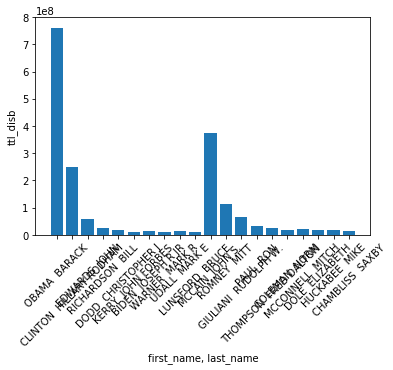

In [63]:
_.bar()

##### For Question 6:

In [64]:
%matplotlib inline

In [65]:
%%sql
SELECT CMTE_NM,count(CMTE_NM) AS count_nm
FROM committee_master
GROUP BY CMTE_NM
ORDER BY count_nm DESC
LIMIT 10;

 * postgresql://student@/Group1
10 rows affected.


cmte_nm,count_nm
ROBINSON FOR CONGRESS,4
SPENCER FOR CONGRESS,3
CLARK FOR CONGRESS,3
ROBERTS FOR CONGRESS,3
DAVIS FOR CONGRESS,3
KELLY FOR CONGRESS,3
SMITH FOR CONGRESS,3
SCHRINER PRESIDENTIAL ELECTION COMMITTEE,3
ROGER OWEN FOR CONGRESS,2
PORTER FOR CONGRESS,2


Comment: Here we plotted the top 10 committee with the most numbers of candidates.

<BarContainer object of 10 artists>

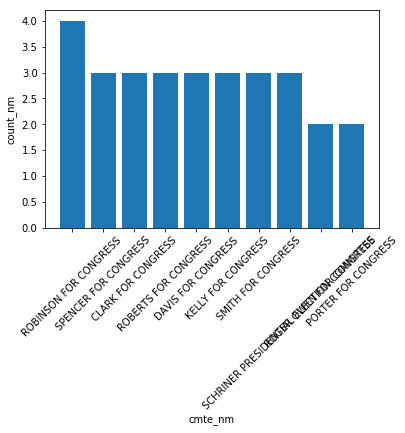

In [66]:
_.bar()

##### For Question 7 (House):

In [67]:
%matplotlib inline

In [68]:
%%sql
SELECT ALL_CANDIDATES.CAND_NAME,ALL_CANDIDATES.TTL_INDIV_CONTRIB
FROM ALL_CANDIDATES,CANDIDATE_MASTER
WHERE CANDIDATE_MASTER.CAND_ID = ALL_CANDIDATES.CAND_ID and CAND_OFFICE = 'H'
ORDER BY TTL_INDIV_CONTRIB DESC
LIMIT 10

 * postgresql://student@/Group1
10 rows affected.


cand_name,ttl_indiv_contrib
"HONEYCUTT, DEBORAH TRAVIS T",5238102.09
"KIRK, MARK STEVEN",4108213.02
"BURNER, DARCY MS.",3684073.01
"RUSSELL, WILLIAM",3591003.15
"GILLIBRAND, KIRSTEN ELIZABETH MRS.",3261155.55
"MCCLINTOCK, THOMAS",3119388.35
"HIMES, JIM",2957593.93
"SEALS, DANIEL JOSEPH",2899392.36
"SESTAK, JOSEPH A. JR.",2769013.11
"MURPHY, PATRICK J",2709555.66


<BarContainer object of 10 artists>

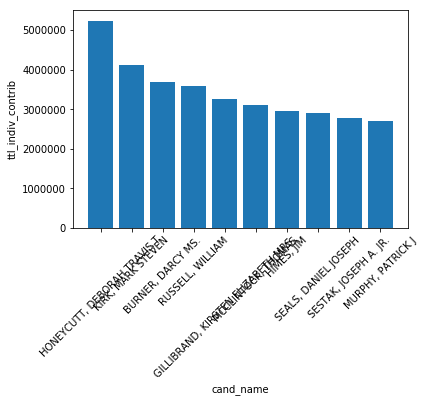

In [69]:
_.bar()

##### For Question 7 (Senate):

In [70]:
%matplotlib inline

In [71]:
%%sql
SELECT ALL_CANDIDATES.CAND_NAME,ALL_CANDIDATES.TTL_INDIV_CONTRIB
FROM ALL_CANDIDATES,CANDIDATE_MASTER
WHERE CANDIDATE_MASTER.CAND_ID = ALL_CANDIDATES.CAND_ID and CAND_OFFICE = 'S'
ORDER BY TTL_INDIV_CONTRIB DESC
LIMIT 10

 * postgresql://student@/Group1
10 rows affected.


cand_name,ttl_indiv_contrib
"FRANKEN, AL",17822723.00
"COLEMAN, NORM",12140399.00
"DOLE, ELIZABETH",11348107.00
"WARNER, MARK R",10946768.00
"CORNYN, JOHN",10061260.00
"MCCONNELL, MITCH",9744238.00
"UDALL, MARK E",8867507.00
"CHAMBLISS, SAXBY",8042364.00
"HAGAN, KAY R",7254212.00
"MARTIN, JAMES FRANCIS",6611792.00


<BarContainer object of 10 artists>

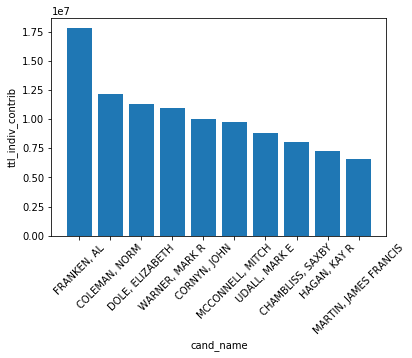

In [72]:
_.bar()